# Analisando as proposições de 2014 - 2016

### Os dados utilizados se encontram no portal de dados abertos da Câmara dos Deputados como sendo referentes aos anos de 2014 até 2018, porém, não houve atualização e inserção das informações de 2017 e 2018 ainda.

#### Link do portal: https://dadosabertos.camara.leg.br/swagger/api.html

#### Foi feito o download do arquivo no formato json disponibilizado no site, o mesmo foi processado por um script feito em python responsável por realizar o parsing e gerar um outro arquivo no formato csv.

#### Carregamento dos dados:

In [1]:
import pandas as pd

data = pd.read_csv('proposicoes/proposicoes_2014_2016.csv', encoding = 'utf8', header = 0)

## Visão Geral

In [2]:
data.shape

(6881, 56)

#### O arquivo contém, portanto, 6881 linhas com proposições e 56 colunas para cada uma. Três primeiras linhas:

In [3]:
data.head(3)

,COD_ORGAO_ORIGEM,NUM_LEGISLATURA_APRESEN,NUM_LEGISLATURA_LEI,NOM_PARTIDO_POLITICO,DAT_VETO_TOTAL,NOM_UF,DES_TIPO_PROPOSICAO,DES_COMPLETA,COD_TIPO_NORMA_JURIDICA_ORIGEM,SIG_UF,...,COD_TIPO_AUTOR_ORIGEM,NUM_SESSAO_LEGISLATIVA_LEI,DAT_FIM_LEGISLATURA_APRESEN,SIG_PARTIDO_POLITICO,IND_ATIVO_TIPO_PROPOSICAO,DAT_INICIO_LEGISLATURA_APRESEN,NUM_PROPOSICAO,COD_TIPO_SESSAO_LEGISLATIVA_LEI,NOM_PARLAMENTAR,DAT_FINAL_RECESSO_APRESEN
0,-1,55,-1,PARTIDO SOCIALISTA BRASILEIRO,NaN,TOCANTINS,PROJETO DE LEI,PROJETO DE LEI,-1,TO,...,TipoParlamentar_10000,-1,31-01-2019,PSB,1,01-02-2015,569.0,-1,VICENTINHO JÚNIOR,NaN
1,-1,55,-1,NaN,NaN,NaN,PROJETO DE LEI,PROJETO DE LEI,-1,NaN,...,TipoParlamentar_10000,-1,31-01-2019,NaN,1,01-02-2015,19.0,-1,OTAVIO LEITE,NaN
2,-1,55,-1,PARTIDO DEMOCRÁTICO TRABALHISTA,NaN,SÃO PAULO,PROJETO DE LEI,PROJETO DE LEI,-1,SP,...,TipoParlamentar_10000,-1,31-01-2019,PDT,1,01-02-2015,581.0,-1,MAJOR OLIMPIO,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6881 entries, 0 to 6880
Data columns (total 56 columns):
COD_ORGAO_ORIGEM                         6881 non-null int64
NUM_LEGISLATURA_APRESEN                  6881 non-null int64
NUM_LEGISLATURA_LEI                      6881 non-null int64
NOM_PARTIDO_POLITICO                     6242 non-null object
DAT_VETO_TOTAL                           2 non-null object
NOM_UF                                   6242 non-null object
DES_TIPO_PROPOSICAO                      6881 non-null object
DES_COMPLETA                             6825 non-null object
COD_TIPO_NORMA_JURIDICA_ORIGEM           6881 non-null int64
SIG_UF                                   6242 non-null object
DAT_FIM_LEGISLATURA_LEI                  89 non-null object
COD_PROPOSICAO_ORIGEM                    6874 non-null float64
DES_ATIVO_TIPO_PROPOSICAO                6881 non-null object
NOM_ORGAO                                619 non-null object
DES_APELIDO_ORGAO                 

In [5]:
data.isnull().any()

COD_ORGAO_ORIGEM                         False
NUM_LEGISLATURA_APRESEN                  False
NUM_LEGISLATURA_LEI                      False
NOM_PARTIDO_POLITICO                      True
DAT_VETO_TOTAL                            True
NOM_UF                                    True
DES_TIPO_PROPOSICAO                      False
DES_COMPLETA                              True
COD_TIPO_NORMA_JURIDICA_ORIGEM           False
SIG_UF                                    True
DAT_FIM_LEGISLATURA_LEI                   True
COD_PROPOSICAO_ORIGEM                     True
DES_ATIVO_TIPO_PROPOSICAO                False
NOM_ORGAO                                 True
DES_APELIDO_ORGAO                         True
DATAPRESENTACAOPROPOSICAO                False
DES_TIPO_AUTOR                           False
COD_SEXO                                  True
IND_ATIVO_ORGAO                          False
COD_TIPO_PARLAMENTAR                     False
DES_TIPO_NORMA_JURIDICA                   True
DES_TIPO_SESS

#### Das 56 totais, apenas 22 colunas estão completas, as outras possuem pelo menos uma linha sem informação.

### Veremos agora as relações entre as proposições e as informações de algumas colunas.

## Proposições x Estados

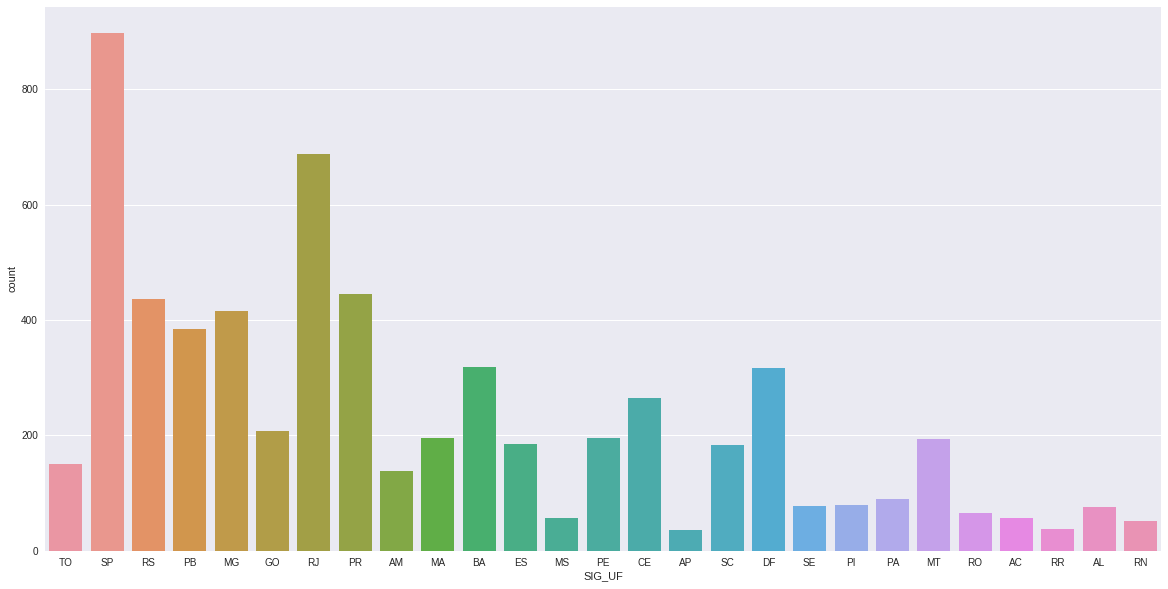

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['SIG_UF'], label = "Quantidade")

#### Ranking dos 6 estados com mais proposições e as respectivas quantidades.

In [7]:
uf_list = data['SIG_UF'].tolist()
uf_counter = {}

for word in uf_list:
    if word in uf_counter:
        uf_counter[word] += 1
    else:
        uf_counter[word] = 1
        
popular_uf = sorted(uf_counter, key = uf_counter.get, reverse = True)
top_6 = popular_uf[:7]

for uf in top_6:
    if type(uf)!= float:
        print(uf + ': ' + str(uf_counter[uf]) + ' proposições')
    else:
        print('Sem a informação do estado: ' + str(uf_counter[uf]) + ' proposições')

SP: 897 proposições
RJ: 688 proposições
Sem a informação do estado: 639 proposições
PR: 445 proposições
RS: 436 proposições
MG: 415 proposições
PB: 384 proposições


#### Quantidade de proposições em cada estado:

In [8]:
uf_counter

{'TO': 151,
 nan: 639,
 'SP': 897,
 'RS': 436,
 'PB': 384,
 'MG': 415,
 'GO': 208,
 'RJ': 688,
 'PR': 445,
 'AM': 139,
 'MA': 196,
 'BA': 319,
 'ES': 185,
 'MS': 57,
 'PE': 195,
 'CE': 265,
 'AP': 36,
 'SC': 184,
 'DF': 317,
 'SE': 77,
 'PI': 79,
 'PA': 90,
 'MT': 193,
 'RO': 66,
 'AC': 56,
 'RR': 37,
 'AL': 76,
 'RN': 51}

## Proposições x Gênero

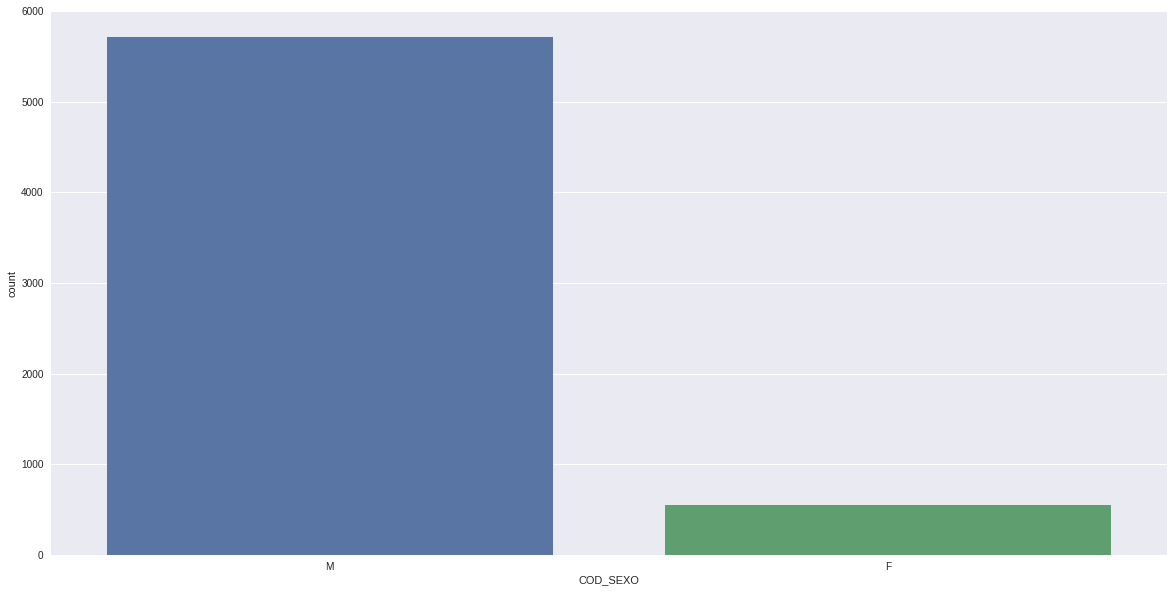

In [9]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['COD_SEXO'], label = "Quantidade")

In [10]:
gender_list = data['COD_SEXO'].tolist()
gender_counter = {}

for gender in gender_list:
    if gender in gender_counter:
        gender_counter[gender] += 1
    else:
        gender_counter[gender] = 1
        
gender_counter

{'M': 5712, 'F': 550, nan: 619}

#### Grande maioria das proposições vieram de homens sendo que 619 não informam o gênero da pessoa que propôs.

## Proposições x Temas

#### Ranking dos 6 temas mais frequentes:

In [11]:
theme_list = data['AREAS_TEMATICAS_APRESENTACAO'].tolist()
theme_counter = {}

for theme in theme_list:
    if theme in theme_counter:
        theme_counter[theme] += 1
    else:
        theme_counter[theme] = 1
        
popular_themes = sorted(theme_counter, key = theme_counter.get, reverse = True)
top_6 = popular_themes[:7]

for theme in top_6:
    print(theme + ': ' + str(theme_counter[theme]) + ' proposições')

DIREITO PENAL E PROCESSUAL PENAL: 441 proposições
ADMINISTRAÇÃO PÚBLICA: 415 proposições
TRIBUTAÇÃO: 336 proposições
DESENVOLVIMENTO URBANO E TRÂNSITO: 310 proposições
TRABALHO E EMPREGO: 289 proposições
SAÚDE: 287 proposições
EDUCAÇÃO: 278 proposições


#### Lista com todos os temas e a quantidade de proposições relacionadas a eles entre 2014 e 2016 se encontra em *temas14_16.txt* dentro do diretório *temas* neste mesmo repositório.

## Proposições x Tipo do Autor

#### Ranking dos tipos de autores do mais frequente ao menos frequente:

In [58]:
author_type_list = data['DES_TIPO_AUTOR'].tolist()
author_type_counter = {}

for author_type in author_type_list:
    if author_type in author_type_counter:
        author_type_counter[author_type] += 1
    else:
        author_type_counter[author_type] = 1
        
popular_author_type = sorted(author_type_counter, key = author_type_counter.get, reverse = True)

for author_type in popular_author_type:
    if author_type_counter[author_type] != 1:
        print(author_type + ': ' + str(author_type_counter[author_type]) + ' proposições')
    else:
        print(author_type + ': ' + str(author_type_counter[author_type]) + ' proposição')

DEPUTADO: 6262 proposições
ÓRGÃO DO PODER LEGISLATIVO: 214 proposições
COMISSÃO PERMANENTE: 189 proposições
ÓRGÃO DO PODER EXECUTIVO: 106 proposições
COMISSÃO PARLAMENTAR DE INQUÉRITO: 33 proposições
ÓRGÃO DO PODER JUDICIÁRIO: 31 proposições
COMISSÃO DIRETORA: 16 proposições
COMISSÃO MISTA PERMANENTE: 12 proposições
COMISSÃO ESPECIAL: 10 proposições
COMISSÃO EXTERNA: 4 proposições
SOCIEDADE CIVIL: 2 proposições
MPU - MINISTÉRIO PÚBLICO DA UNIÃO: 1 proposição
DPU - DEFENSORIA PÚBLICA DA UNIÃO: 1 proposição


#### A grande maioria das proposições partem dos deputados.

## Proposições x Ano

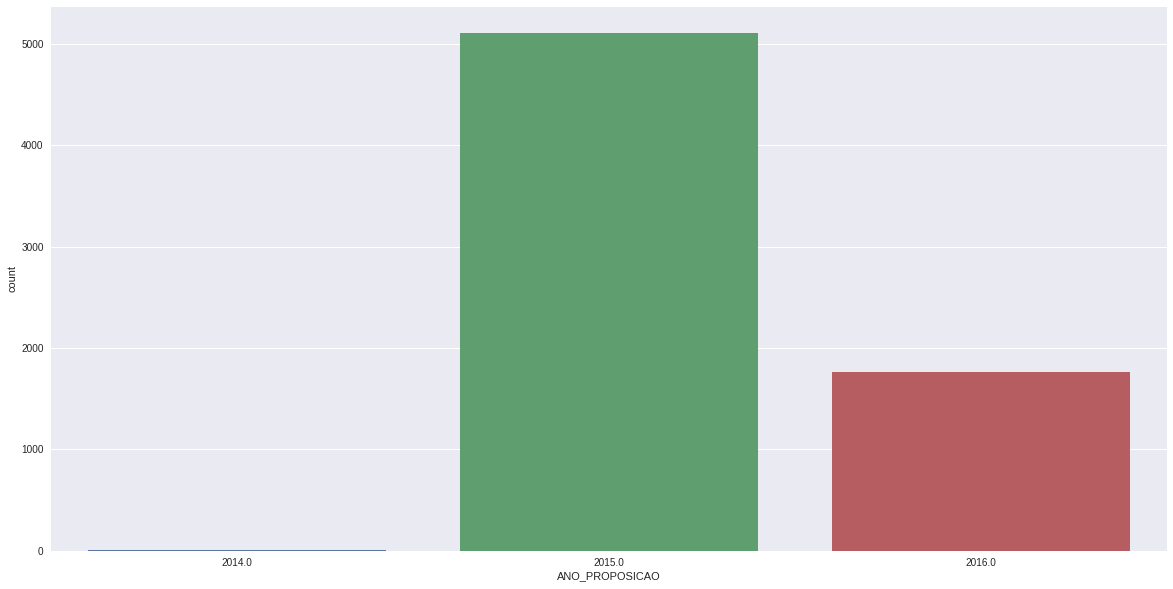

In [23]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['ANO_PROPOSICAO'], label = "Quantidade")

#### Ranking:

In [90]:
year_list = data['ANO_PROPOSICAO'].tolist()
year_counter = {}

for year in year_list:
    if year in year_counter:
        year_counter[year] += 1
    else:
        year_counter[year] = 1
        
popular_year = sorted(year_counter, key = year_counter.get, reverse = True)

for year in popular_year:
    if year_counter[year] != 1:
        print(str(year) + ': ' + str(year_counter[year]) + ' proposições')

2015.0: 5107 proposições
2016.0: 1764 proposições
2014.0: 3 proposições


## Proposições x Região

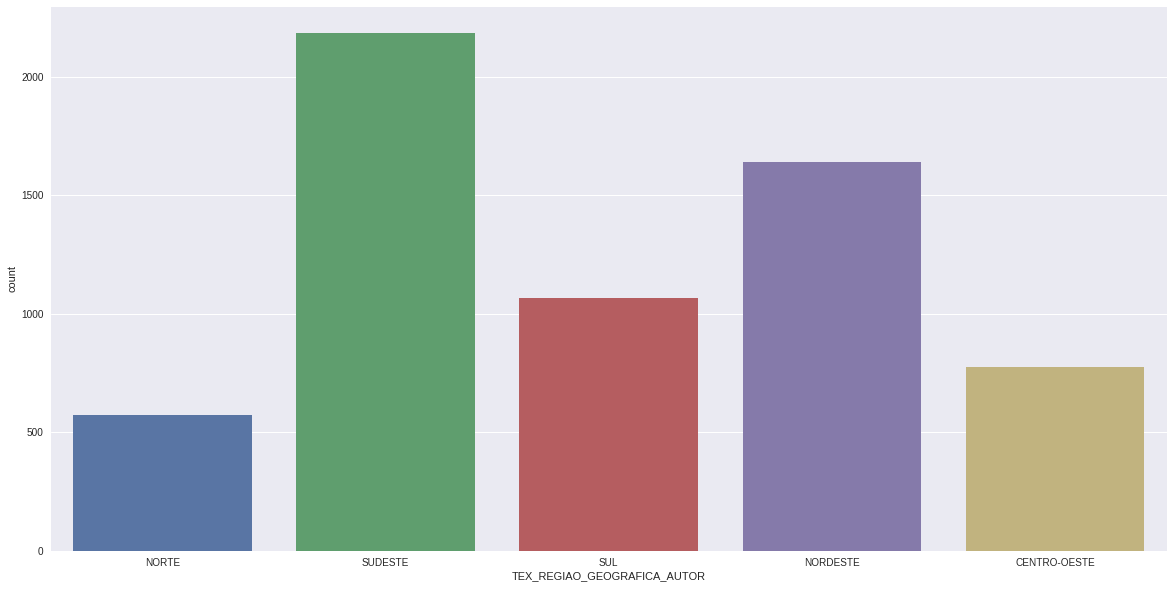

In [24]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['TEX_REGIAO_GEOGRAFICA_AUTOR'], label = "Quantidade")

#### Ranking:

In [91]:
region_list = data['TEX_REGIAO_GEOGRAFICA_AUTOR'].tolist()
region_counter = {}

for region in region_list:
    if region in region_counter:
        region_counter[region] += 1
    else:
        region_counter[region] = 1
        
popular_region = sorted(region_counter, key = region_counter.get, reverse = True)

for region in popular_region:
    if type(region) != float:
        print(region + ': ' + str(region_counter[region]) + ' proposições')
    else:
        print('Sem informação de região: ' + str(region_counter[region]) + ' proposições')

SUDESTE: 2185 proposições
NORDESTE: 1642 proposições
SUL: 1065 proposições
CENTRO-OESTE: 775 proposições
Sem informação de região: 639 proposições
NORTE: 575 proposições


## Proposições x Tipos

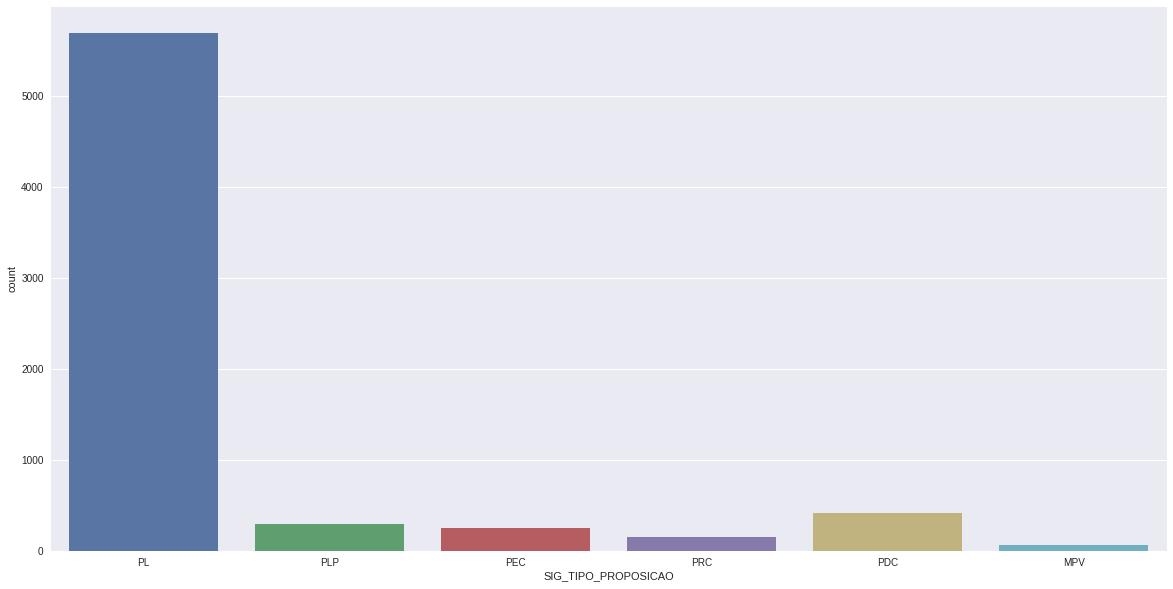

In [26]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['SIG_TIPO_PROPOSICAO'], label = "Quantidade")

#### Ranking:

In [70]:
proposition_list = data['SIG_TIPO_PROPOSICAO'].tolist()
proposition_counter = {}

for proposition in proposition_list:
    if proposition in proposition_counter:
        proposition_counter[proposition] += 1
    else:
        proposition_counter[proposition] = 1
        
popular_proposition = sorted(proposition_counter, key = proposition_counter.get, reverse = True)

for proposition in popular_proposition:
    print(proposition + ': ' + str(proposition_counter[proposition]) + ' proposições')

PL: 5692 proposições
PDC: 421 proposições
PLP: 297 proposições
PEC: 250 proposições
PRC: 157 proposições
MPV: 64 proposições


#### Legenda: 

* PL = Projetos de Lei 
* PDC = Projetos de Decreto Legislativo da Câmara
* PLP = Projetos de Lei Complementar
* PEC = Projetos de Emenda à Constituição
* MPV = Medidas Provisórias
* PRC = Projeto de Resolução da Câmara

## Proposições x Partidos Políticos

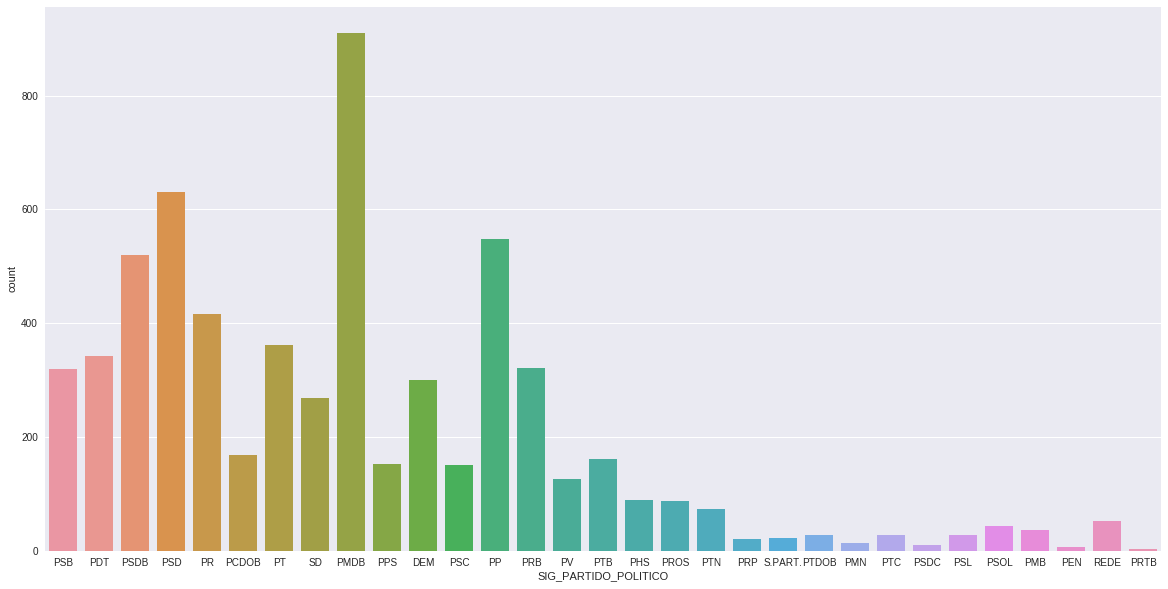

In [29]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['SIG_PARTIDO_POLITICO'], label = "Quantidade")

#### Ranking dos 6 partidos com mais proposições e as respectivas quantidades:

In [92]:
pp_list = data['SIG_PARTIDO_POLITICO'].tolist()
pp_counter = {}

for pp in pp_list:
    if pp in pp_counter:
        pp_counter[pp] += 1
    else:
        pp_counter[pp] = 1
        
popular_pp = sorted(pp_counter, key = pp_counter.get, reverse = True)
top_7 = popular_pp[:7]

for pp in top_7:
    if type(pp) != float:
        print(pp + ': ' + str(pp_counter[pp]) + ' proposições')
    else:
        print('Sem informação de partido: ' + str(pp_counter[pp]) + ' proposições')

PMDB: 910 proposições
Sem informação de partido: 639 proposições
PSD: 630 proposições
PP: 548 proposições
PSDB: 520 proposições
PR: 416 proposições
PT: 361 proposições


#### Lista de todos os partidos e suas respectivas quantidades:

In [78]:
print(pp_counter)

{'PSB': 319, nan: 639, 'PDT': 343, 'PSDB': 520, 'PSD': 630, 'PR': 416, 'PCDOB': 169, 'PT': 361, 'SD': 269, 'PMDB': 910, 'PPS': 153, 'DEM': 301, 'PSC': 151, 'PP': 548, 'PRB': 321, 'PV': 126, 'PTB': 162, 'PHS': 90, 'PROS': 87, 'PTN': 74, 'PRP': 20, 'S.PART.': 23, 'PTDOB': 28, 'PMN': 13, 'PTC': 28, 'PSDC': 10, 'PSL': 28, 'PSOL': 43, 'PMB': 36, 'PEN': 7, 'REDE': 52, 'PRTB': 4}


## Proposições x Nome do Parlamentar

#### Ranking dos 10 deputados com mais proposições:

In [81]:
name_list = data['NOM_PARLAMENTAR'].tolist()
name_counter = {}

for name in name_list:
    if name in name_counter:
        name_counter[name] += 1
    else:
        name_counter[name] = 1
        
popular_name = sorted(name_counter, key = name_counter.get, reverse = True)
top_10 = popular_name[:11]

for name in top_10:
    if type(name) != float:
        print(name + ': ' + str(name_counter[name]) + ' proposições')
    else:
        print('Sem informação do nome do deputado: ' + str(name_counter[name]) + ' proposições')

Sem informação do nome do deputado: 619 proposições
RÔMULO GOUVEIA: 182 proposições
MARCELO BELINATI: 172 proposições
ALBERTO FRAGA: 145 proposições
VENEZIANO VITAL DO RÊGO: 115 proposições
CARLOS BEZERRA: 115 proposições
POMPEO DE MATTOS: 114 proposições
GOULART: 95 proposições
CARLOS HENRIQUE GAGUIM: 81 proposições
CABO SABINO: 71 proposições
CARLOS MANATO: 57 proposições


#### Média de proposições por deputado:

In [82]:
counter = 0
for name in name_counter:
    counter = counter + name_counter[name]
    
print("Média de proposições por deputado: %.2f" % ((counter-619)/(len(name_counter)-1)))  # 619 proposições sem nome do deputado (nan)

Média de proposições por deputado: 12.33


#### Lista com todos os deputados e a quantidade de proposições feitas por cada um durante todos os anos de mandato se encontra no arquivo *deputados&qnt_proposicoes_2014_2016.txt* dentro do diretório *deputados&qnt_proposicoes* neste mesmo repositório.